# Visualising relationships - ggplot2

In this section, I'll look at one of the most basic tools for visualising relationships between continuous variables - the scatter plot. 

Scatter plots are great. They allow us to visually represent our data, and if relationships exist between the variables plotted, we'll be able to see them straight away.

Let's see some examples using the good old `mpg` dataset.

We'd like to know if there's a relationship between a car's engine size (the `displ` variable) and its fuel efficiency in the city (the `cty` variable, measured in miles per gallon). It feels like there should be a relationship there, right? (What direction do we expect the relationship to be?)

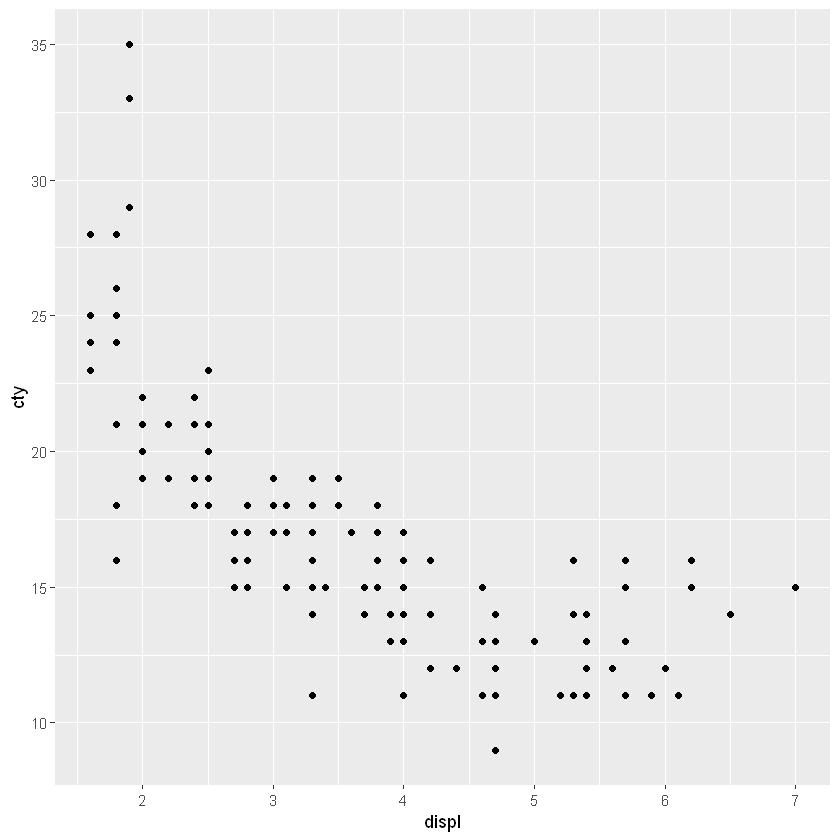

In [2]:
library(tidyverse)

ggplot(mpg) +
    geom_point(mapping = aes(x  = displ, y = cty))

As engine size increases, fuel efficiency decreases.

Good to see the inverse relationship between engine size and fuel efficiency, but we feel like there are other dimensions here. For instance, a few cars stick out from the pack towards the lower right of this dataset. What's going on with them?

These cars have large engines, but are slightly more fuel efficient. I have a hypothesis that these cars are rear-wheel drive. It feels like they probably have larger engines than front-wheel drive, and maybe they're more efficient as well (you might be able to tell that I don't know a lot about cars). To investigate this hypothesis, we can colour the points in the plot by the type of "drive" of the car, variable `drv`:

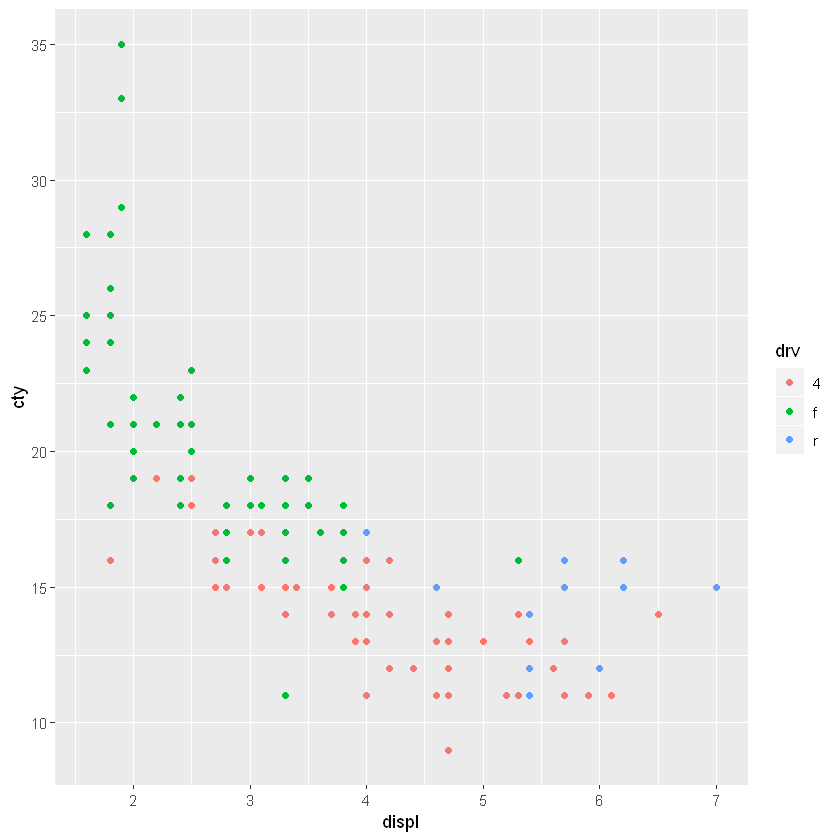

In [4]:
ggplot(mpg) + 
    geom_point(mapping = aes(x = displ, y = cty, color = drv))

The points are coloured now by the type of drive: front ***f***, rear ***r***, or 4-wheel ***4***. We can now see clearly that four-wheel drive cars are generally less fuel efficient, and front-wheel drive cars have usually got smaller engines.

Some of the cars in that group are rear-wheel drive, but not all. We would need to do some more investigation here, but we have learnt some new things about our dataset through this explanation.

The `ggplot` layers let us build up the plot adding extra visualisations to discover the patterns in the data. For example, adding a trendline to our original scatter plot is simple:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


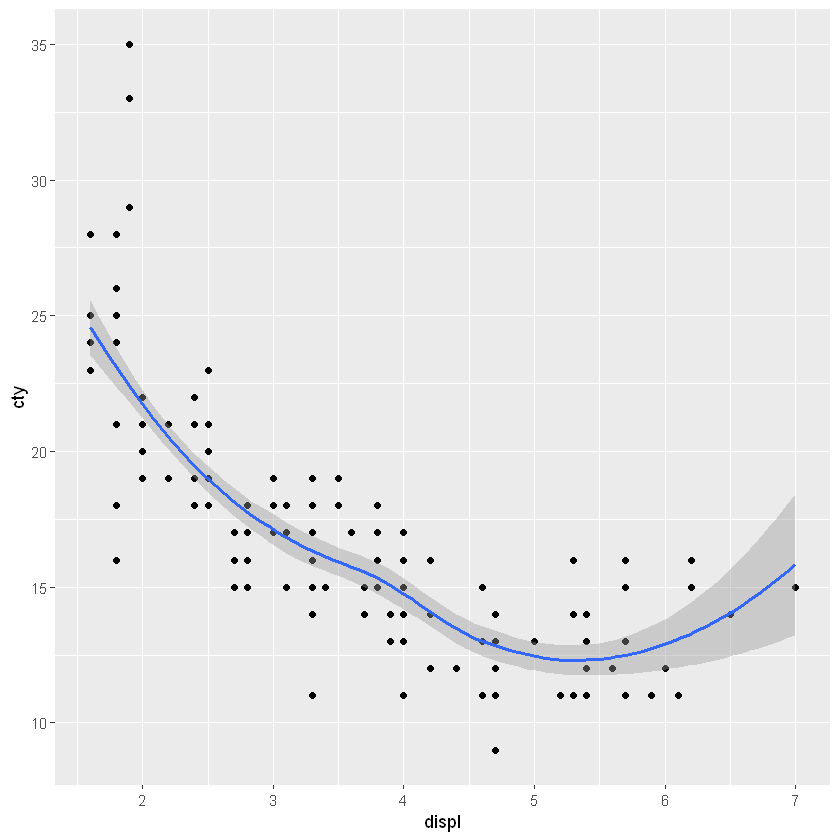

In [5]:
ggplot(mpg) + 
    geom_point(mapping = aes(x  = displ, y = cty)) +
    geom_smooth(mapping = aes(x  = displ, y = cty)) 

Why to type that mapping out twice? When we can make our code a little bit more compact:

Adding separate trendlines for each type of drive in our coloured scatterplot is similar:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


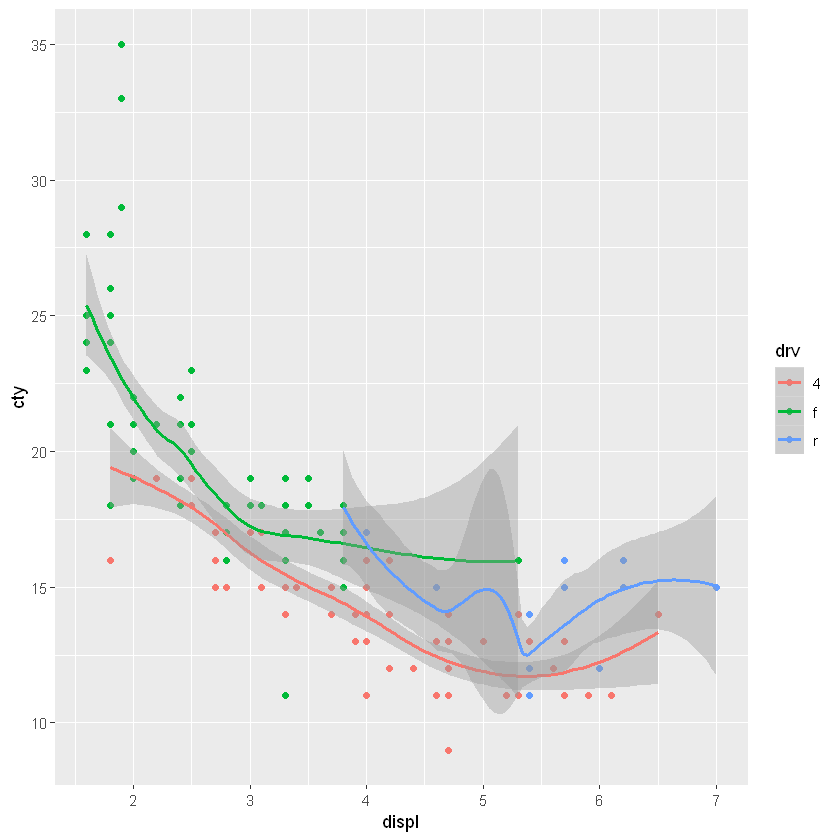

In [7]:
ggplot(mpg, mapping = aes(x = displ, y = cty, colour = drv)) + 
      geom_point() + 
      geom_smooth() 

Our figure is now getting a bit messy, so we can split each type of drive into its own plot using a `facet_wrap`:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


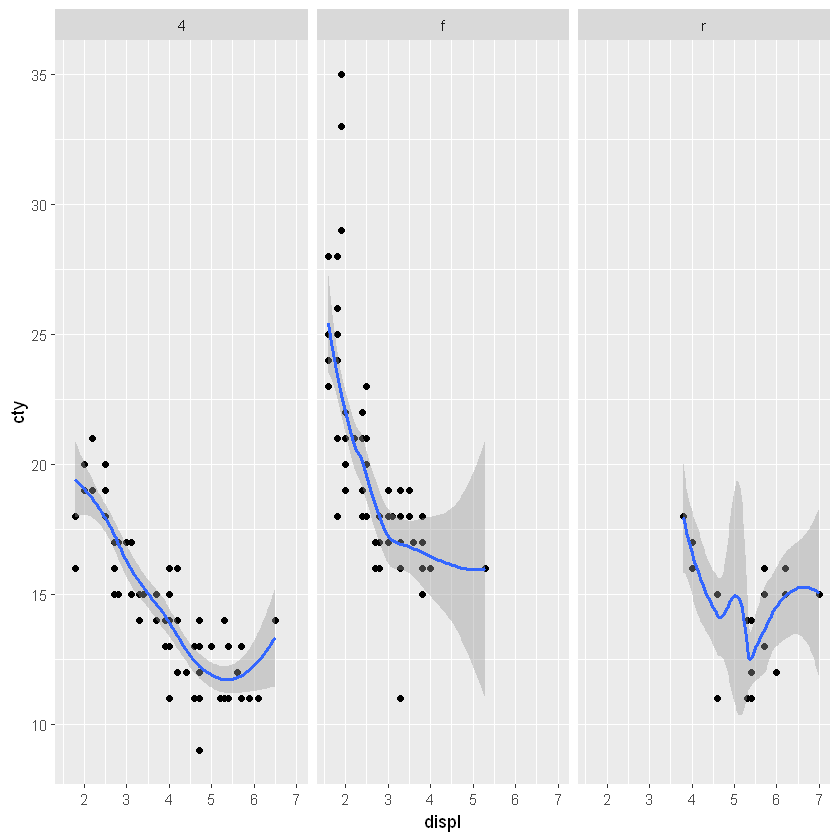

In [8]:
ggplot(mpg, mapping = aes(x = displ, y = cty)) + 
      geom_point() + 
      geom_smooth() +
      facet_wrap( ~ drv) 